In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

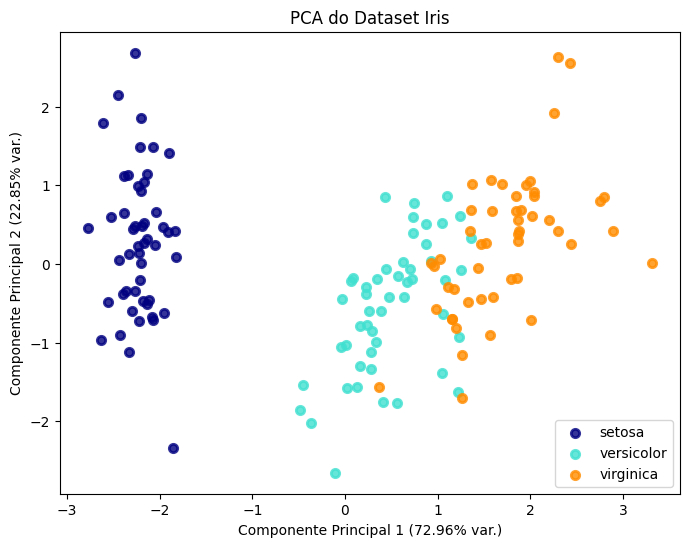

In [5]:
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA do Dataset Iris')
plt.xlabel('Componente Principal 1 ({}% var.)'.format(
    round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('Componente Principal 2 ({}% var.)'.format(
    round(pca.explained_variance_ratio_[1]*100, 2)))
plt.show()

In [13]:
print("Variância explicada por cada componente:")
print(pca.explained_variance_ratio_)

Variância explicada por cada componente:
[0.72962445 0.22850762]


In [7]:
pca_components = pd.DataFrame(pca.components_, columns=feature_names)
print("\nContribuição das features originais para cada Componente Principal:")
print(pca_components)


Contribuição das features originais para cada Componente Principal:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.521066         -0.269347           0.580413          0.564857
1           0.377418          0.923296           0.024492          0.066942


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


In [10]:
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Acurácia com todas as features: {acc_all:.4f}")
print(f"Acurácia com PCA (2 componentes): {acc_pca:.4f}")
print(f"Redução de dimensionalidade: {X.shape[1]} -> {X_pca.shape[1]} features")

Acurácia com todas as features: 0.9778
Acurácia com PCA (2 componentes): 0.9111
Redução de dimensionalidade: 4 -> 2 features
